In [1]:
%reload_ext autoreload
%autoreload 2

import math
import sys
from pathlib import Path

import glob2
import numpy as np
import pandas as pd
from azureml.core import Dataset, Workspace
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import convert_age_from_days_to_years, extractqrcode, draw_sex_distribution, draw_age_distribution

### read the csv and total no. of children

In [2]:
DATASET_PATH = Path('/mnt/datasets/pcd_50k')

In [3]:
! ls /mnt/datasets/pcd_50k/qrcode/1583438117-spfyeecneo/measure/1591122016705/pc/pc_1583438117-spfyeecneo_1591122016705_100_000.pcd

/mnt/datasets/pcd_50k/qrcode/1583438117-spfyeecneo/measure/1591122016705/pc/pc_1583438117-spfyeecneo_1591122016705_100_000.pcd


In [4]:
scans = pd.read_csv(DATASET_PATH / 'labels/scans.csv')
print("Total no. of children:", len(scans))
scans.head()

Total no. of children: 1680


,qrcode,person_id,age,sex,Years
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,4
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,3
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,4


In [5]:
scans.describe()

,age,Years
count,1680.000000,1680.000000
mean,1398.369643,3.861905
std,263.351921,0.752190
min,914.000000,3.000000
25%,1166.000000,3.000000
50%,1406.000000,4.000000
75%,1621.250000,4.000000
max,2094.000000,6.000000


### getting the total of gender

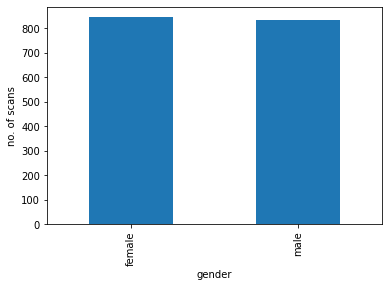

In [6]:
plt.figure()
ax = draw_sex_distribution(scans)
plt.show()

In [7]:
#adding the Years column into dataframe
scans['Years'] = scans.apply(convert_age_from_days_to_years, axis=1)
scans.head(2)

,qrcode,person_id,age,sex,Years
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,3
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4


### plotting the bar graph no. of children against age

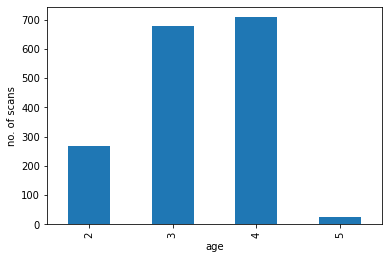

In [8]:
plt.figure()
draw_age_distribution(scans)
plt.show()

### getting the distribition based on gender

In [9]:
male = scans[scans['sex']=='male']
print('No. of male distribution: ')
print(male['Years'].value_counts())

No. of male distribution: 
4    373
3    321
2    129
5     12
Name: Years, dtype: int64


In [10]:
female = scans[scans['sex']=='female']
print('No. of female distribution: ')
print(female['Years'].value_counts())

No. of female distribution: 
3    356
4    335
2    140
5     14
Name: Years, dtype: int64


### Reading the csv files and get the data at artifacts level

In [11]:
artifacts = pd.read_csv(DATASET_PATH / 'labels/artifacts.csv')
artifacts.head()

,artifacts,storage_path,qrcode,key,height,weight,muac,zscore_height,zscore_weight,zscore_muac
0,pc_1584997475-0195z663pl_1591588126306_100_000...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
1,pc_1584997475-0195z663pl_1591588126306_100_001...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
2,pc_1584997475-0195z663pl_1591588126306_100_002...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
3,pc_1584997475-0195z663pl_1591588126306_100_003...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
4,pc_1584997475-0195z663pl_1591588126306_100_004...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008


In [12]:
## dropping the null values from the artifacts 
artifacts  = artifacts.dropna()

In [13]:
artifacts.describe()

,key,height,weight,muac,zscore_height,zscore_weight,zscore_muac
count,42298.000000,42298.000000,42298.000000,42298.000000,42298.000000,42298.000000,42298.000000
mean,100.996548,93.752121,12.381007,14.250253,1.238570,1.833350,2.259290
std,0.752257,7.029523,1.838878,1.020104,0.994711,0.997211,1.024201
min,100.000000,58.300000,7.650000,11.500000,-3.777749,-0.732104,-0.502008
25%,100.000000,88.700000,11.100000,13.600000,0.523508,1.138829,1.606426
50%,101.000000,93.600000,12.350000,14.200000,1.216803,1.816703,2.208835
75%,102.000000,98.700000,13.550000,14.900000,1.938396,2.467462,2.911647
max,102.000000,114.700000,19.000000,18.200000,4.202216,5.422993,6.224900


In [14]:
print("Total no. of pointclouds:",len(artifacts ))

Total no. of pointclouds: 42298


101.0    18362
100.0    12041
102.0    11895
Name: key, dtype: int64


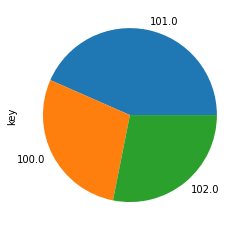

In [15]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie')

### plotting the height and weight distribution

In [16]:
artifacts['qrcode'] = artifacts.apply(extractqrcode, axis=1)
artifacts.head()

,artifacts,storage_path,qrcode,key,height,weight,muac,zscore_height,zscore_weight,zscore_muac
0,pc_1584997475-0195z663pl_1591588126306_100_000...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
1,pc_1584997475-0195z663pl_1591588126306_100_001...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
2,pc_1584997475-0195z663pl_1591588126306_100_002...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
3,pc_1584997475-0195z663pl_1591588126306_100_003...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
4,pc_1584997475-0195z663pl_1591588126306_100_004...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008


In [17]:
getheight = artifacts.drop_duplicates(subset=['qrcode']).reset_index(drop=True)
getheight.head()

,artifacts,storage_path,qrcode,key,height,weight,muac,zscore_height,zscore_weight,zscore_muac
0,pc_1584997475-0195z663pl_1591588126306_100_000...,qrcode/1584997475-0195z663pl/measure/159158812...,1584997475-0195z663pl,100.0,85.7,9.45,12.5,0.099042,0.244035,0.502008
1,pc_1584999865-01t0n240ra_1591629837700_100_008...,qrcode/1584999865-01t0n240ra/measure/159162983...,1584999865-01t0n240ra,100.0,86.5,12.45,13.1,0.212233,1.870933,1.104418
2,pc_1583942091-02migjdla1_1591470015961_100_000...,qrcode/1583942091-02migjdla1/measure/159147001...,1583942091-02migjdla1,100.0,71.6,8.10,13.5,-1.895949,-0.488069,1.506024
3,pc_1585011777-031jov4jpw_1591815240163_100_000...,qrcode/1585011777-031jov4jpw/measure/159181524...,1585011777-031jov4jpw,100.0,78.5,11.75,15.3,-0.919677,1.491323,3.313253
4,pc_1585003039-032hniw434_1591707933084_102_000...,qrcode/1585003039-032hniw434/measure/159170793...,1585003039-032hniw434,102.0,108.1,15.50,14.8,3.268390,3.524946,2.811245


In [18]:
print("Total no.unique scans:", len(getheight))

Total no.unique scans: 1680


Text(0, 0.5, 'height')

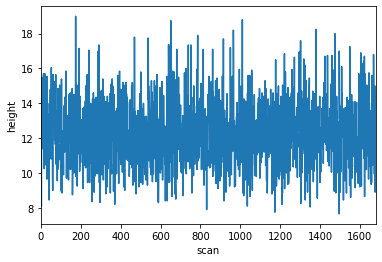

In [19]:
heightax = getheight['weight'].plot()
heightax.set_xlabel('scan')
heightax.set_ylabel('height')

Text(0.5, 0, 'weight')

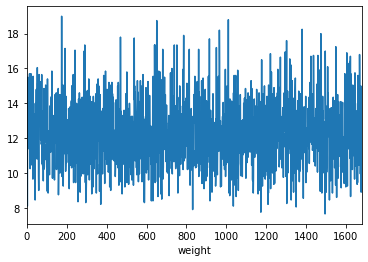

In [20]:
weightax = getheight['weight'].plot()
weightax.set_xlabel('scan')
weightax.set_xlabel('weight')

In [21]:
distribution_data = pd.merge(scans, getheight[['height', 'weight', 'muac', 'qrcode']], on='qrcode', how='left')
distribution_data.head()

,qrcode,person_id,age,sex,Years,height,weight,muac
0,1584997475-0195z663pl,DQKAiT6cSJkQW2ya_person_1569888000000_Dj66PtJa...,1420,male,3,85.7,9.45,12.5
1,1584999865-01t0n240ra,lD0OAaaZ0pcD0zRk_person_1570060800000_1AoTKLlT...,1529,female,4,86.5,12.45,13.1
2,1583942091-02migjdla1,ZPFkcYGhq15raY3J_person_1573603200000_lfu3HzFC...,945,female,2,71.6,8.10,13.5
3,1585011777-031jov4jpw,D7tiN7CtUEM9WoRx_person_1571270400000_Q1hKfLbv...,924,male,2,78.5,11.75,15.3
4,1585003039-032hniw434,8SMAKMkY79LovcBU_person_1570838400000_nMpSBNek...,1320,female,3,108.1,15.50,14.8


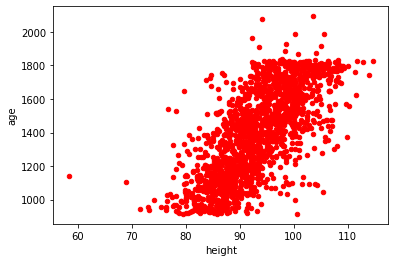

In [22]:
#distribution of height against age
heightvsage = distribution_data.plot.scatter(x='height', y='age', c='red')

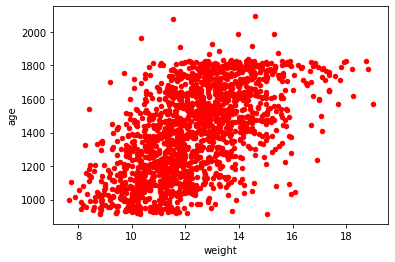

In [23]:
#distribution of weight against age
weightvsage = distribution_data.plot.scatter(x='weight', y='age', c='red')

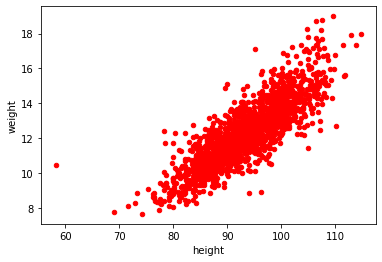

In [24]:
## distribution of height against weight
weight_vs_height = distribution_data.plot.scatter(x='height', y='weight', c='red')

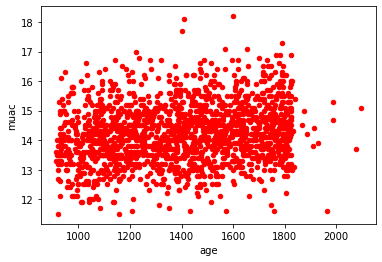

In [25]:
## distribution of age against weight
weight_vs_height = distribution_data.plot.scatter(x='age', y='muac', c='red')

## No outliers

In [26]:
artifacts.describe()

,key,height,weight,muac,zscore_height,zscore_weight,zscore_muac
count,42298.000000,42298.000000,42298.000000,42298.000000,42298.000000,42298.000000,42298.000000
mean,100.996548,93.752121,12.381007,14.250253,1.238570,1.833350,2.259290
std,0.752257,7.029523,1.838878,1.020104,0.994711,0.997211,1.024201
min,100.000000,58.300000,7.650000,11.500000,-3.777749,-0.732104,-0.502008
25%,100.000000,88.700000,11.100000,13.600000,0.523508,1.138829,1.606426
50%,101.000000,93.600000,12.350000,14.200000,1.216803,1.816703,2.208835
75%,102.000000,98.700000,13.550000,14.900000,1.938396,2.467462,2.911647
max,102.000000,114.700000,19.000000,18.200000,4.202216,5.422993,6.224900


In [27]:
scans.describe()

,age,Years
count,1680.000000,1680.000000
mean,1398.369643,3.292262
std,263.351921,0.747240
min,914.000000,2.000000
25%,1166.000000,3.000000
50%,1406.000000,3.000000
75%,1621.250000,4.000000
max,2094.000000,5.000000


## Check on the amount of artifacts and scans from the dataset

In [28]:
# Takes 11min
dataset = glob2.glob(str(DATASET_PATH / 'qrcode/**/*.pcd'))
len(dataset)

42298

In [29]:
print("Total no. of pointclouds in csv:", len(artifacts))
print("Total no. of pointclouds in dataset:", len(dataset))

Total no. of pointclouds in csv: 42298
Total no. of pointclouds in dataset: 42298


In [30]:
## extracting the qrcodes
qrcodes_data = []
for path in dataset:
    data =path.split('/')
    qrcodes_data.append(data[4])
qrc_dataframe = pd.DataFrame(qrcodes_data, columns=['qrcodes'])

In [31]:
print("Total no. of scans in dataset:", len(qrc_dataframe['qrcodes'].unique()))
print("Total no. of scans in csv:", len(scans))      

Total no. of scans in dataset: 1
Total no. of scans in csv: 1680
